In [8]:
import numpy as np
from collections import Counter 
import random
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle
plt.rcParams['figure.figsize']=(10.0,8.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'

In [9]:
iris=datasets.load_iris()
X,y=shuffle(iris.data,iris.target,random_state=13)
X=X.astype(np.float32)
offset=int(X.shape[0]*0.7)
X_train,y_train=X[:offset],y[:offset]
X_test,y_test=X[offset:],y[offset:]
y_train=y_train.reshape((-1,1))
y_test=y_test.reshape((-1,1))

print('X_train=',X_train.shape)
print('X_test=',X_test.shape)
print('y_train=',y_train.shape)
print('y_test=',y_test.shape)

X_train= (105, 4)
X_test= (45, 4)
y_train= (105, 1)
y_test= (45, 1)


In [10]:
def compute_distances(X):
    num_test=X.shape[0]
    num_train=X_train.shape[0]
    dists=np.zeros((num_test,num_train))
    
    M=np.dot(X,X_train.T)
    te=np.square(X).sum(axis=1)
    tr=np.square(X_train).sum(axis=1)
    #使用广播机制相加
    dists=np.sqrt(-2*M+tr+np.matrix(te).T)
    return dists

(45, 105)


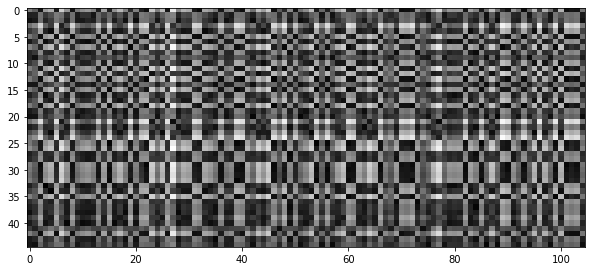

In [12]:
dists=compute_distances(X_test)
print(dists.shape)
plt.imshow(dists)
plt.show()

In [35]:
def predict_labels(dists,k=1):
    num_test=dists.shape[0]
    y_pred=np.zeros(num_test)
    for i in range(num_test):
        closest_y=[]
        #argsort()函数将数组的值从小到大排序后按照其对应的索引值输出
        labels=y_train[np.argsort(dists[i,:])].flatten()
        closest_y=labels[0:k]
        
        c=Counter(closest_y)
        y_pred[i]=c.most_common(1)[0][0]
    
    return y_pred

In [36]:
y_test_pred=predict_labels(dists,k=1)
y_test_pred=y_test_pred.reshape((-1,1))
num_correct=np.sum(y_test_pred==y_test)
accuracy=float(num_correct)/X_test.shape[0]
print("accuracy:",accuracy)

accuracy: 0.9777777777777777


In [39]:
num_folds=5
k_choices=[2,3,5,8,10,12,15,20,50,100]

X_train_folds=[]
y_train_folds=[]

X_train_folds=np.array_split(X_train,num_folds)
y_train_folds=np.array_split(y_train,num_folds)
k_accuracies={}
for k in k_choices:
    for fold in range(num_folds):
        validation_X_test=X_train_folds[fold]
        validation_y_test=y_train_folds[fold]
        temp_X_train=np.concatenate(X_train_folds[:fold]+X_train_folds[fold+1:])
        temp_y_test=np.concatenate(y_train_folds[:fold]+y_train_folds[fold+1:])
        
        temp_dists=compute_distances(validation_X_test)
        temp_y_test_pred=predict_labels(temp_dists,k=k)
        temp_y_test_pred=temp_y_test_pred.reshape((-1,1))
        
        num_correct=np.sum(temp_y_test_pred==validation_y_test)
        num_test=validation_X_test.shape[0]
        accuracy=float(num_correct)/num_test
        k_accuracies[k]=k_accuracies.get(k,[])+[accuracy]
        
for k in sorted(k_accuracies):
    for accuracy in k_accuracies[k]:
        print('k=%d,accuracy=%f'%(k,accuracy))

k=2,accuracy=1.000000
k=2,accuracy=1.000000
k=2,accuracy=1.000000
k=2,accuracy=1.000000
k=2,accuracy=1.000000
k=3,accuracy=1.000000
k=3,accuracy=1.000000
k=3,accuracy=0.952381
k=3,accuracy=0.857143
k=3,accuracy=0.952381
k=5,accuracy=1.000000
k=5,accuracy=1.000000
k=5,accuracy=0.952381
k=5,accuracy=0.904762
k=5,accuracy=0.952381
k=8,accuracy=1.000000
k=8,accuracy=1.000000
k=8,accuracy=1.000000
k=8,accuracy=0.904762
k=8,accuracy=1.000000
k=10,accuracy=1.000000
k=10,accuracy=1.000000
k=10,accuracy=1.000000
k=10,accuracy=0.904762
k=10,accuracy=1.000000
k=12,accuracy=1.000000
k=12,accuracy=1.000000
k=12,accuracy=1.000000
k=12,accuracy=0.904762
k=12,accuracy=1.000000
k=15,accuracy=1.000000
k=15,accuracy=1.000000
k=15,accuracy=0.952381
k=15,accuracy=0.904762
k=15,accuracy=1.000000
k=20,accuracy=1.000000
k=20,accuracy=1.000000
k=20,accuracy=1.000000
k=20,accuracy=0.904762
k=20,accuracy=0.952381
k=50,accuracy=1.000000
k=50,accuracy=1.000000
k=50,accuracy=1.000000
k=50,accuracy=0.761905
k=50,acc

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


最佳k值为： 2


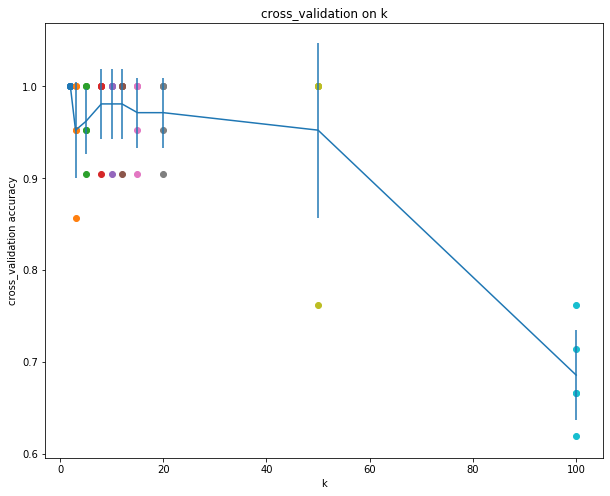

In [41]:
for k in k_choices:
    accuracies=k_accuracies[k]
    plt.scatter([k]*len(accuracies),accuracies)
    
accuracies_mean=np.array([np.mean(v) for k,v in sorted(k_accuracies.items())])
accuracies_std=np.array([np.std(v) for k,v in sorted(k_accuracies.items())])
best_k=k_choices[np.argmax(accuracies_mean)]
print('最佳k值为：',best_k)
plt.errorbar(k_choices,accuracies_mean,yerr=accuracies_std)
plt.title('cross_validation on k')
plt.xlabel('k')
plt.ylabel('cross_validation accuracy')
plt.show()

In [2]:
import numpy as np
from collections import Counter
import random
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
class KNearestNeighbor(object):
    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X
        self.y_train = y    
    
    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train)) 

        M = np.dot(X, self.X_train.T)
        te = np.square(X).sum(axis=1)
        tr = np.square(self.X_train).sum(axis=1)
        dists = np.sqrt(-2 * M + tr + np.matrix(te).T)        
        return dists    
        
    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)         
        for i in range(num_test):
            closest_y = []
            labels = self.y_train[np.argsort(dists[i, :])].flatten()
            closest_y = labels[0:k]

            c = Counter(closest_y)
            y_pred[i] = c.most_common(1)[0][0]        
        return y_pred    
        
    def cross_validation(self, X_train, y_train):
        num_folds = 5
        k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

        X_train_folds = []
        y_train_folds = []

        X_train_folds = np.array_split(X_train, num_folds)
        y_train_folds = np.array_split(y_train, num_folds)

        k_to_accuracies = {}        
        for k in k_choices:            
            for fold in range(num_folds): 
                validation_X_test = X_train_folds[fold]
                validation_y_test = y_train_folds[fold]
                temp_X_train = np.concatenate(X_train_folds[:fold] + X_train_folds[fold + 1:])
                temp_y_train = np.concatenate(y_train_folds[:fold] + y_train_folds[fold + 1:])


                self.train(temp_X_train, temp_y_train )

                temp_dists = self.compute_distances(validation_X_test)
                temp_y_test_pred = self.predict_labels(temp_dists, k=k)
                temp_y_test_pred = temp_y_test_pred.reshape((-1, 1))                #Checking accuracies
                num_correct = np.sum(temp_y_test_pred == validation_y_test)
                num_test = validation_X_test.shape[0]
                accuracy = float(num_correct) / num_test
                k_to_accuracies[k] = k_to_accuracies.get(k,[]) + [accuracy]        # Print out the computed accuracies
        
        for k in sorted(k_to_accuracies):            
            for accuracy in k_to_accuracies[k]:
                print('k = %d, accuracy = %f' % (k, accuracy))

        accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
        best_k = k_choices[np.argmax(accuracies_mean)]
        print('最佳k值为{}'.format(best_k))        
        
        return best_k    
        
    def create_train_test(self):
        iris=datasets.load_iris()
        X, y = shuffle(iris.data, iris.target, random_state=13)
        X = X.astype(np.float32)
        y = y.reshape((-1,1))
        offset = int(X.shape[0] * 0.7)
        X_train, y_train = X[:offset], y[:offset]
        X_test, y_test = X[offset:], y[offset:]
        y_train = y_train.reshape((-1,1))
        y_test = y_test.reshape((-1,1))        
        return X_train, y_train, X_test, y_test



if __name__ == '__main__':
    knn_classifier = KNearestNeighbor()
    X_train, y_train, X_test, y_test = knn_classifier.create_train_test()
    best_k = knn_classifier.cross_validation(X_train, y_train)
    dists = knn_classifier.compute_distances(X_test)
    y_test_pred = knn_classifier.predict_labels(dists, k=best_k)
    y_test_pred = y_test_pred.reshape((-1, 1))
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / X_test.shape[0]
    print('Got %d / %d correct => accuracy: %f' % (num_correct,X_test.shape[0],accuracy))

k = 1, accuracy = 0.904762
k = 1, accuracy = 1.000000
k = 1, accuracy = 0.952381
k = 1, accuracy = 0.857143
k = 1, accuracy = 0.952381
k = 3, accuracy = 0.857143
k = 3, accuracy = 1.000000
k = 3, accuracy = 0.952381
k = 3, accuracy = 0.857143
k = 3, accuracy = 0.952381
k = 5, accuracy = 0.857143
k = 5, accuracy = 1.000000
k = 5, accuracy = 0.952381
k = 5, accuracy = 0.904762
k = 5, accuracy = 0.952381
k = 8, accuracy = 0.904762
k = 8, accuracy = 1.000000
k = 8, accuracy = 0.952381
k = 8, accuracy = 0.904762
k = 8, accuracy = 0.952381
k = 10, accuracy = 0.952381
k = 10, accuracy = 1.000000
k = 10, accuracy = 0.952381
k = 10, accuracy = 0.904762
k = 10, accuracy = 0.952381
k = 12, accuracy = 0.952381
k = 12, accuracy = 1.000000
k = 12, accuracy = 0.952381
k = 12, accuracy = 0.857143
k = 12, accuracy = 0.952381
k = 15, accuracy = 0.952381
k = 15, accuracy = 1.000000
k = 15, accuracy = 0.952381
k = 15, accuracy = 0.857143
k = 15, accuracy = 0.952381
k = 20, accuracy = 0.952381
k = 20, accu